In [1]:
import pandas as pd
import pandas_datareader.data as web
import pandas_datareader as pdr
import os
import numpy as np
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.palettes import Spectral8 # 色を考えなくても良い　地味に素敵 https://bokeh.pydata.org/en/latest/docs/reference/palettes.html
from datetime import datetime
from datetime import timedelta
%matplotlib inline
output_notebook()

Loading BokehJS ...

In [2]:
start = datetime(2008, 9, 11)
end = datetime(2018, 2, 9)
mstar_spx = web.DataReader('SPX', 'morningstar', start, end)

In [3]:
mstar_spx.head()

Close  High  Low  Open  Volume
Symbol Date                                          
SPX    2008-09-11  1249.0486   NaN  NaN   NaN       0
       2008-09-12  1251.7009   NaN  NaN   NaN       0
       2008-09-15  1192.7021   NaN  NaN   NaN       0
       2008-09-16  1213.5862   NaN  NaN   NaN       0
       2008-09-17  1156.3861   NaN  NaN   NaN       0

In [4]:
mstar_spx.tail()

Close     High      Low     Open      Volume
Symbol Date                                                        
SPX    2018-02-05  2648.9391  2763.39  2638.17  2741.06  3205516825
       2018-02-06  2695.1442  2701.04  2593.07  2614.78  3667048182
       2018-02-07  2681.6601  2727.67  2681.33  2690.95  2559829157
       2018-02-08  2580.9995  2685.27  2580.56  2685.01  2910724979
       2018-02-09  2619.5456  2638.67  2532.69  2601.78  3437391201

In [5]:
mstar_spx2 = web.DataReader('SPX', 'morningstar', '1900-01-01')

In [6]:
mstar_spx2.head()

Close  High  Low  Open  Volume
Symbol Date                                      
SPX    1928-01-03  17.76   NaN  NaN   NaN       0
       1928-01-04  17.72   NaN  NaN   NaN       0
       1928-01-05  17.55   NaN  NaN   NaN       0
       1928-01-06  17.66   NaN  NaN   NaN       0
       1928-01-09  17.50   NaN  NaN   NaN       0

### 株価以外のデータ・ソース
* Enigma / https://public.enigma.com/    
API KEYがいるみたいなのでパス   
* FRED / https://fred.stlouisfed.org/   
セントルイス連銀が出しているデータ
* WORLD BANK / https://data.worldbank.org/
* OECD / http://stats.oecd.org/
* Eurostats / http://ec.europa.eu/eurostat/   
   
色々とあります。データありすぎ問題・・・

In [7]:
# FRED のデータを取得してみる。注目されている米国金利 FF、２年、１０年、３０年
start_f = datetime(1980,1,1)
end_f = datetime(2018,2,9)
# FF https://fred.stlouisfed.org/series/FF ２年 https://fred.stlouisfed.org/series/GS2
# 10年　https://fred.stlouisfed.org/series/DGS10 30年 https://fred.stlouisfed.org/series/DGS30
# Dがつくとdailyのよう。つけないとmonthly
f_ff = web.DataReader('FF', 'fred', start_f, end_f) 
f_2 = web.DataReader('GS2', 'fred', start_f, end_f)
f_10 = web.DataReader('GS10', 'fred', start_f, end_f)
f_30 = web.DataReader('GS30', 'fred', start_f, end_f)

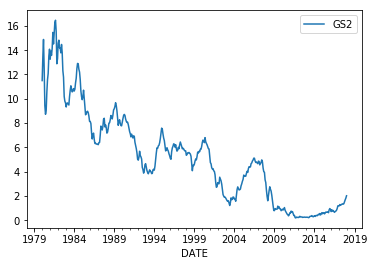

In [8]:
f_2.plot()

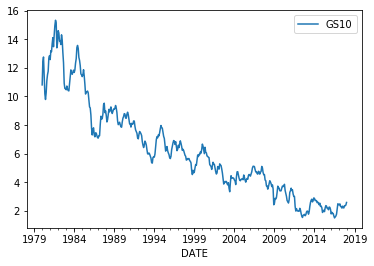

In [9]:
f_10.plot()

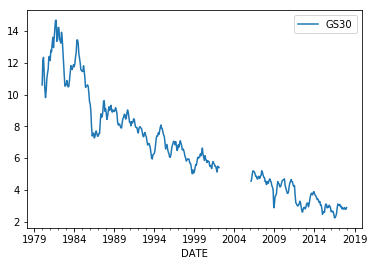

In [10]:
f_30.plot()

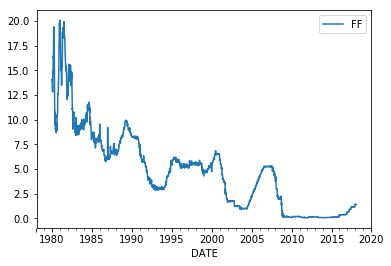

In [11]:
f_ff.plot()

In [12]:
# 負債の状況 自動車ローン https://fred.stlouisfed.org/series/MVLOAS
f_car = web.DataReader('MVLOAS', 'fred', start_f, end_f)

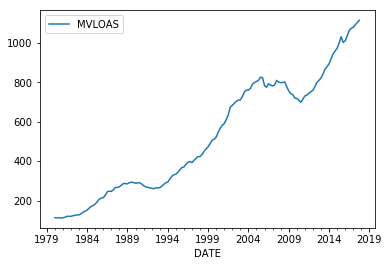

In [13]:
f_car.plot()

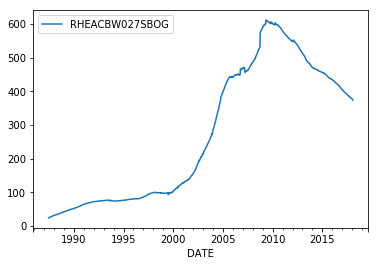

In [14]:
# 不動産ローン
f_re = web.DataReader('RHEACBW027SBOG', 'fred', start_f, end_f)
f_re.plot()

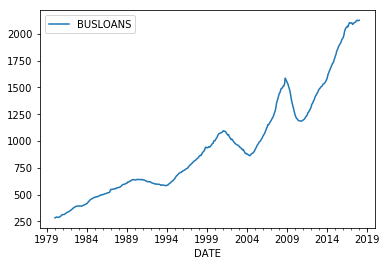

In [15]:
# 全産業ローン
f_loan = web.DataReader('BUSLOANS', 'fred', start_f, end_f)
f_loan.plot()

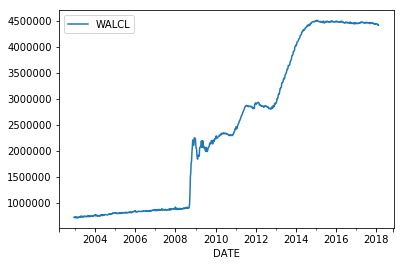

In [16]:
# FED TOTAL ASSET 
f_fed_asset = web.DataReader('WALCL', 'fred', start_f, end_f)
f_fed_asset.plot()

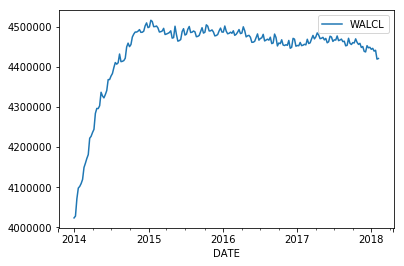

In [17]:
f_fed_asset['2014':].plot()

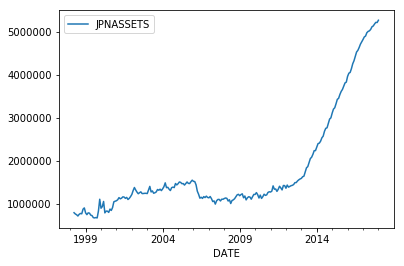

In [18]:
# BOJ TOTAL ASSET
f_boj = web.DataReader('JPNASSETS', 'fred', start_f, end_f)
f_boj.plot()

In [19]:
# World Bank
from pandas_datareader import wb

In [20]:
mat = wb.search('elect')

In [21]:
mat

,id,name,source,sourceNote,sourceOrganization,topics,unit
24,1.1_ACCESS.ELECTRICITY.TOT,Access to electricity (% of total population),Sustainable Energy for All,Access to electricity is the percentage of pop...,b'World Bank Global Electrification Database 2...,,
39,1.2_ACCESS.ELECTRICITY.RURAL,Access to electricity (% of rural population),Sustainable Energy for All,Access to electricity is the percentage of rur...,b'World Bank Global Electrification Database 2...,,
40,1.3_ACCESS.ELECTRICITY.URBAN,Access to electricity (% of urban population),Sustainable Energy for All,Access to electricity is the percentage of tot...,b'World Bank Global Electrification Database 2...,,
42,2.0.cov.Ele,Coverage: Electricity,LAC Equity Lab,The coverage rate is the childhood access rate...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty,
67,2.0.hoi.Ele,HOI: Electricity,LAC Equity Lab,The Human Opportunities Index (HOI) is an econ...,b'LAC Equity Lab tabulations of SEDLAC (CEDLAS...,Poverty,
158,4.1.1_TOTAL.ELECTRICITY.OUTPUT,Total electricity output (GWh),Sustainable Energy for All,Total electricity output (GWh): Total number o...,b'World Bank and International Energy Agency (...,,
159,4.1.2_REN.ELECTRICITY.OUTPUT,Renewable energy electricity output (GWh),Sustainable Energy for All,Renewable energy electricity output (GWh): Tot...,b'World Bank and International Energy Agency (...,,
172,4.1_SHARE.RE.IN.ELECTRICITY,Renewable electricity (% in total electricity ...,Sustainable Energy for All,Renewable electricity (% in total electricity ...,b'World Bank and International Energy Agency (...,,
4811,EG.ELC.ACCS.RU.ZS,"Access to electricity, rural (% of rural popul...",World Development Indicators,"World Bank, Sustainable Energy for All (SE4ALL...","b'World Bank, Sustainable Energy for All (SE4A...",Agriculture & Rural Development ; Energy & M...,
4812,EG.ELC.ACCS.UR.ZS,"Access to electricity, urban (% of urban popul...",World Development Indicators,"Access to electricity, rural is the percentage...","b'World Bank, Sustainable Energy for All (SE4A...",Energy & Mining ; Urban Development,


In [22]:
dat = wb.download(indicator='EG.ELC.ACCS.UR.ZS')

In [23]:
dat

EG.ELC.ACCS.UR.ZS
country       year                   
Canada        2005         100.000000
              2004         100.000000
              2003         100.000000
Mexico        2005          99.605581
              2004          99.390082
              2003          99.579957
United States 2005         100.000000
              2004         100.000000
              2003         100.000000

In [24]:
eu = web.DataReader('teimf060', 'eurostat', start_f)

In [25]:
eu

MATURITY,Maturity: 1 year,Maturity: 10 years,Maturity: 5 years
BONDS,AAA rated euro area central government bonds,AAA rated euro area central government bonds,AAA rated euro area central government bonds
CURV_TYP,Zero-coupon yield curve spot rate,Zero-coupon yield curve spot rate,Zero-coupon yield curve spot rate
GEO,"Euro area (EA11-2000, EA12-2006, EA13-2007, EA15-2008, EA16-2010, EA17-2013, EA18-2014, EA19)","Euro area (EA11-2000, EA12-2006, EA13-2007, EA15-2008, EA16-2010, EA17-2013, EA18-2014, EA19)","Euro area (EA11-2000, EA12-2006, EA13-2007, EA15-2008, EA16-2010, EA17-2013, EA18-2014, EA19)"
FREQ,Monthly,Monthly,Monthly
TIME_PERIOD,,,
2017-02-01,-0.81,0.38,-0.43
2017-03-01,-0.84,0.43,-0.35
2017-04-01,-0.80,0.32,-0.42
2017-05-01,-0.73,0.44,-0.31
2017-06-01,-0.71,0.37,-0.34


In [26]:
eu2 = web.DataReader('teimf050', 'eurostat', '1900')

In [27]:
eu2

INTRT       EMU convergence criterion bond yields                           \
GEO                                       Austria Belgium Bulgaria  Cyprus   
FREQ                                      Monthly Monthly  Monthly Monthly   
TIME_PERIOD                                                                  
2017-01-01                                   0.57    0.70     1.77    3.45   
2017-02-01                                   0.59    0.87     1.75    3.37   
2017-03-01                                   0.59    0.87     1.73    3.34   
2017-04-01                                   0.49    0.78     1.78    3.23   
2017-05-01                                   0.65    0.77     1.74    3.03   
2017-06-01                                   0.55    0.62     1.70    2.84   
2017-07-01                                   0.73    0.83     1.65    2.57   
2017-08-01                                   0.61    0.73     1.70    2.49   
2017-09-01                                   0.59    0.70     1.66    2.20   
2017-10-01                                   0.61    0.69     1.40    1.84   
2017-11-01                                   0.51    0.58     1.33    1.54   
2017-12-01                                   0.50    0.53     1.02    1.58   

INTRT                                                                        \
GEO         Czech Republic Germany (until 1990 former territory of the FRG)   
FREQ               Monthly                                          Monthly   
TIME_PERIOD                                                                   
2017-01-01            0.47                                             0.25   
2017-02-01            0.63                                             0.26   
2017-03-01            0.87                                             0.35   
2017-04-01            0.96                                             0.22   
2017-05-01            0.74                                             0.34   
2017-06-01            0.77                                             0.25   
2017-07-01            0.90                                             0.46   
2017-08-01            0.83                                             0.35   
2017-09-01            0.97                                             0.35   
2017-10-01            1.45                                             0.37   
2017-11-01            1.68                                             0.31   
2017-12-01            1.50                                             0.30   

INTRT                \
GEO         Denmark   
FREQ        Monthly   
TIME_PERIOD           
2017-01-01     0.37   
2017-02-01     0.33   
2017-03-01     0.19   
2017-04-01     0.55   
2017-05-01     0.64   
2017-06-01     0.53   
2017-07-01     0.67   
2017-08-01     0.55   
2017-09-01     0.51   
2017-10-01     0.53   
2017-11-01     0.44   
2017-12-01     0.41   

INTRT                                                                                                      \
GEO         Euro area (EA11-2000, EA12-2006, EA13-2007, EA15-2008, EA16-2010, EA17-2013, EA18-2014, EA19)   
FREQ                                                                                              Monthly   
TIME_PERIOD                                                                                                 
2017-01-01                                                1.10                                              
2017-02-01                                                1.24                                              
2017-03-01                                                1.27                                              
2017-04-01                                                1.14                                              
2017-05-01                                                1.13                                              
2017-06-01                                                1.01                                              
2017-07-01                 

In [28]:
eu2.columns

MultiIndex(levels=[['EMU convergence criterion bond yields'], ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (EA11-2000, EA12-2006, EA13-2007, EA15-2008, EA16-2010, EA17-2013, EA18-2014, EA19)', 'European Union (27 countries)', 'European Union (28 countries)', 'Finland', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom'], ['Monthly']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 4, 5, 13, 6, 8, 7, 14, 28, 9, 10, 11, 12, 3, 15, 16, 17, 19, 20, 18, 21, 22, 23, 24, 25, 29, 27, 26, 30], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
           names=['INTRT', 'GEO', 'FREQ'])

## pandas_datareaderを使って分析を作ってみる
* FRB議長が交代する時に、新議長を試すために市場が荒れることがよくあるそうな。
* 幾つかの指標を使ってみてみます！
* 参考　　wikipedia 連邦準備制度　https://ja.wikipedia.org/wiki/%E9%80%A3%E9%82%A6%E6%BA%96%E5%82%99%E5%88%B6%E5%BA%A6

In [29]:
chair_p = {}
chair_p = pd.DataFrame(chair_p)
chair_p['name'] = ['Charles Hamlin', 'William Harding', 'Daniel Crissinger', 'Roy Young', 'Eugene Meyer', \
                  'Eugene Black', 'Marriner Eccles', 'Thomas McCabe', 'William Martin', 'Authur Burns', \
                  'William Miller', 'Paul Volker', 'Alan Greenspan', 'Ben Bernanke', 'Janet Yellen', 'Jerome Powell']
chair_p['start'] = [datetime(1914,8,10), datetime(1916,8,10), datetime(1923,5,1), datetime(1927,10,4), \
                   datetime(1930,9,16), datetime(1933,5,19), datetime(1934,11,15), datetime(1948,4,15), \
                   datetime(1951,4,2), datetime(1970,2,2), datetime(1978,3,8), datetime(1979,8,6), \
                   datetime(1987,8,11), datetime(2006,2,1), datetime(2014,2,3), datetime(2018,2,5)]
chair_p['end'] = [datetime(1916,8,10), datetime(1922,8,9), datetime(1927,9,15), datetime(1930,8,30), \
                 datetime(1933,5,10),datetime(1934,8,15), datetime(1948,1,31), datetime(1951,3,31), \
                 datetime(1970,1,31), datetime(1978,1,31), datetime(1979,8,6), datetime(1987,8,11), \
                 datetime(2006,1,31), datetime(2014,1,31), datetime(2018,2,5), '-']

In [30]:
chair_p

,name,start,end
0,Charles Hamlin,1914-08-10,1916-08-10 00:00:00
1,William Harding,1916-08-10,1922-08-09 00:00:00
2,Daniel Crissinger,1923-05-01,1927-09-15 00:00:00
3,Roy Young,1927-10-04,1930-08-30 00:00:00
4,Eugene Meyer,1930-09-16,1933-05-10 00:00:00
5,Eugene Black,1933-05-19,1934-08-15 00:00:00
6,Marriner Eccles,1934-11-15,1948-01-31 00:00:00
7,Thomas McCabe,1948-04-15,1951-03-31 00:00:00
8,William Martin,1951-04-02,1970-01-31 00:00:00
9,Authur Burns,1970-02-02,1978-01-31 00:00:00


In [31]:
chair_p['before_365'] = 0
chair_p['after_365'] = 0

In [32]:
for i in range(len(chair_p)):
    a = chair_p.iloc[i, 1] - timedelta(days=365)
    b = chair_p.iloc[i, 1] + timedelta(days=365)
    chair_p.iloc[i, 3] = '{}-{}'.format(a.year, a.month)
    chair_p.iloc[i, 4] = '{}-{}'.format(b.year, b.month)

In [33]:
chair_p

,name,start,end,before_365,after_365
0,Charles Hamlin,1914-08-10,1916-08-10 00:00:00,1913-8,1915-8
1,William Harding,1916-08-10,1922-08-09 00:00:00,1915-8,1917-8
2,Daniel Crissinger,1923-05-01,1927-09-15 00:00:00,1922-5,1924-4
3,Roy Young,1927-10-04,1930-08-30 00:00:00,1926-10,1928-10
4,Eugene Meyer,1930-09-16,1933-05-10 00:00:00,1929-9,1931-9
5,Eugene Black,1933-05-19,1934-08-15 00:00:00,1932-5,1934-5
6,Marriner Eccles,1934-11-15,1948-01-31 00:00:00,1933-11,1935-11
7,Thomas McCabe,1948-04-15,1951-03-31 00:00:00,1947-4,1949-4
8,William Martin,1951-04-02,1970-01-31 00:00:00,1950-4,1952-4
9,Authur Burns,1970-02-02,1978-01-31 00:00:00,1969-2,1971-2


In [34]:
spx = web.DataReader('^SPX', 'stooq')
spx = spx.sort_index()

In [35]:
spx.loc['2014-02-03']

Open      1.782680e+03
High      1.784830e+03
Low       1.739660e+03
Close     1.741890e+03
Volume    7.444766e+08
Name: 2014-02-03 00:00:00, dtype: float64

In [36]:
spx.head()

,Open,High,Low,Close,Volume
Date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,NaN
1789-06-01,0.51,0.51,0.51,0.51,NaN
1789-07-01,0.50,0.50,0.50,0.50,NaN
1789-08-01,0.50,0.51,0.50,0.51,NaN
1789-09-01,0.51,0.51,0.50,0.51,NaN


## S&P500指数の1941年からの算出なのになんてこった！！
https://ja.wikipedia.org/wiki/S%26P_500

In [37]:
spx = spx['1941':]

In [38]:
spx.head()

,Open,High,Low,Close,Volume
Date,,,,,
1941-01-02,10.52,10.58,10.46,10.48,NaN
1941-01-03,10.61,10.74,10.57,10.72,NaN
1941-01-04,10.69,10.78,10.69,10.72,NaN
1941-01-06,10.71,10.81,10.71,10.74,NaN
1941-01-07,10.73,10.79,10.69,10.75,NaN


In [39]:
spx7 = spx[chair_p.iloc[7,3]:chair_p.iloc[7,4]] / spx.loc[chair_p.iloc[7,1], 'Close'] * 100
spx8 = spx[chair_p.iloc[8,3]:chair_p.iloc[8,4]] / spx.loc[chair_p.iloc[8,1], 'Close'] * 100
spx9 = spx[chair_p.iloc[9,3]:chair_p.iloc[9,4]] / spx.loc[chair_p.iloc[9,1], 'Close'] * 100
spx10 = spx[chair_p.iloc[10,3]:chair_p.iloc[10,4]] / spx.loc[chair_p.iloc[10,1], 'Close'] * 100
spx11 = spx[chair_p.iloc[11,3]:chair_p.iloc[11,4]] / spx.loc[chair_p.iloc[11,1], 'Close'] * 100
spx12 = spx[chair_p.iloc[12,3]:chair_p.iloc[12,4]] / spx.loc[chair_p.iloc[12,1], 'Close'] * 100
spx13 = spx[chair_p.iloc[13,3]:chair_p.iloc[13,4]] / spx.loc[chair_p.iloc[13,1], 'Close'] * 100
spx14 = spx[chair_p.iloc[14,3]:chair_p.iloc[14,4]] / spx.loc[chair_p.iloc[14,1], 'Close'] * 100
spx15 = spx[chair_p.iloc[15,3]:chair_p.iloc[15,4]] / spx.loc[chair_p.iloc[15,1], 'Close'] * 100

In [40]:
spx7.index = spx7.index - chair_p.iloc[7,1]
spx8.index = spx8.index - chair_p.iloc[8,1]
spx9.index = spx9.index - chair_p.iloc[9,1]
spx10.index = spx10.index - chair_p.iloc[10,1]
spx11.index = spx11.index - chair_p.iloc[11,1]
spx12.index = spx12.index - chair_p.iloc[12,1]
spx13.index = spx13.index - chair_p.iloc[13,1]
spx14.index = spx14.index - chair_p.iloc[14,1]
spx15.index = spx15.index - chair_p.iloc[15,1]

In [41]:
p = figure(width=700, height = 500, title='FRB議長交代１年前後の株価の動き')

p.line(spx7.index, spx7.Close, legend='McCabe', line_color=Spectral8[0])
p.line(spx8.index, spx8.Close, legend='Martin', line_color=Spectral8[1])
p.line(spx9.index, spx9.Close, legend='Burns', line_color=Spectral8[2])
p.line(spx10.index, spx10.Close, legend='Miller', line_color=Spectral8[3])
p.line(spx11.index, spx11.Close, legend='Volker', line_color=Spectral8[4])
p.line(spx12.index, spx12.Close, legend='Greenspan', line_color=Spectral8[5])
p.line(spx13.index, spx13.Close, legend='Bernanke',line_color=Spectral8[6])
p.line(spx14.index, spx14.Close, legend='Yellen', line_color=Spectral8[7])
p.line(spx15.index, spx15.Close, legend='Powell', line_color='black', line_width=3)

p.legend.location = 'bottom_left'
show(p)